In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [177]:
data.shape

(20640, 10)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [179]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [180]:
label_mapping = {
    'NEAR BAY': 0,
    '<1H OCEAN':1,
    'INLAND': 2,
    'NEAR OCEAN':3,
    'ISLAND':4 
}
data['ocean_proximity'] = data['ocean_proximity'].map(label_mapping)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [182]:
cleaned_data = data.dropna()

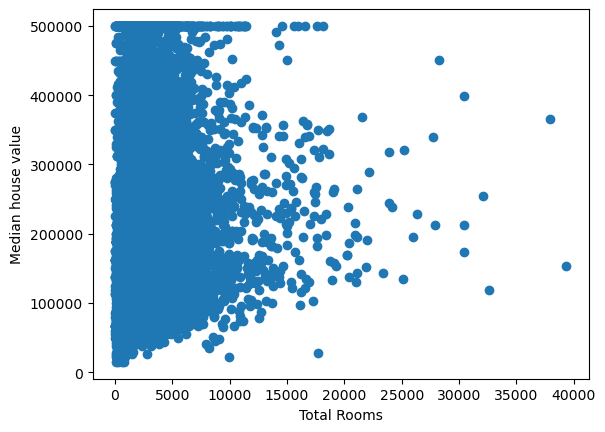

In [183]:
plt.scatter(cleaned_data['total_rooms'],cleaned_data['median_house_value'])
plt.xlabel("Total Rooms")
plt.ylabel("Median house value")
plt.show()

In [184]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   median_income       20433 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


In [185]:
X = cleaned_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households','population', 'median_income']]
y = cleaned_data[['median_house_value']]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [187]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [188]:
model = reg.fit(X_train, y_train)

In [189]:
predictions = reg.predict(X_test)

In [190]:
predictions.shape

(4087, 1)

In [191]:
y_test.shape

(4087, 1)

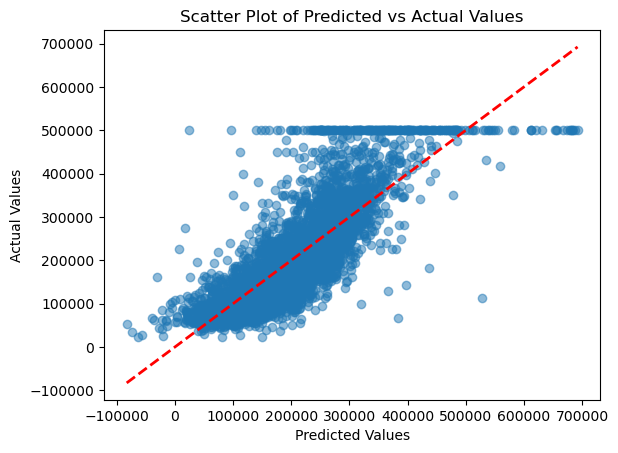

In [192]:
plt.scatter(predictions, y_test, alpha=0.5)
plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatter Plot of Predicted vs Actual Values")
plt.show()

In [194]:
r2 = r2_score(y_test, predictions)
r2

0.6438218168550311